In [1]:
import os, datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.img_tiles

import ipyFUNCTIONS

In [2]:
begin_date = datetime.datetime(2017, 9, 12) # start date/time to plot
end_date = datetime.datetime(2017, 9, 13) # end date/time to plot
lonlat = [-80.8496, 32.0084]

path_fulldom = os.path.join('Fulldom_hires.nc') # a path for Fulldom_hires.nc
var_fulldom = 'TOPOGRAPHY' # variable in Fulldom_hires.nc
offset_fulldom = -1.5

path = os.path.join('OUTPUTS', '*.RTOUT_DOMAIN1') # files that contain the variable
var = 'sfcheadsubrt' # variable
#var = 'SOIL_M' # variable
layer = {'soil_layers_stag': 0, 'snow_layers': None, 'vis_nir': None} # if there is another layer other than x and y, it is necessary to select the layer to plot

offset, factor = 0, 1 # ds[var] = (ds[var] + offset) * factor

The codes below show functions to convert coordinates between lon/lat and x/y based on Fulldom_hires.nc.

In [3]:
ds_ref = xr.open_dataset(path_fulldom, decode_coords = 'all')
print('INPUT lon/lat:', lonlat)

# Print the converted x/y value using lon/lat
xy_result = ipyFUNCTIONS.convert_lonlat2xy(lonlat, ds_ref)
print('Converted x/y:', xy_result)

# Print the converted lon/lat value using x/y
lonlat_result = ipyFUNCTIONS.convert_xy2lonlat(xy_result, ds_ref)
print('Converted lon/lat:', lonlat_result)

INPUT lon/lat: [-80.8496, 32.0084]
Converted x/y: (14181.96704075756, -167.60190215699743)
Converted lon/lat: (-80.8496, 32.0084)


The codes below show a function to extract a value at the nearest lon/lat or x/y from Fulldom_hires.nc.

In [4]:
# Print the nearest value in Fulldom_hires.nc using lon/lat or x/y
ds_fulldom_lonlat = ipyFUNCTIONS.extract_fulldom(loc = lonlat, path_fulldom = path_fulldom, var = var_fulldom, loc_type = 'lonlat')
print('Given lon/lat, the nearest {} value:'.format(var_fulldom), ds_fulldom_lonlat)

ds_fulldom_xy = ipyFUNCTIONS.extract_fulldom(loc = xy_result, path_fulldom = path_fulldom, var = var_fulldom, loc_type = 'xy')
print('Given x/y, the nearest {} value:'.format(var_fulldom), ds_fulldom_xy)

Given lon/lat, the nearest TOPOGRAPHY value: 1.5535444
Given x/y, the nearest TOPOGRAPHY value: 1.5535444


Once loading variables as a xarray dataset, you can process it as you need. <br>
The example below is to load **all the output variables** from the given path files.

In [5]:
# Load outputs as a xarray dataset without given variables
ds_novar = ipyFUNCTIONS.load_nc(path = path, begin_date = begin_date, end_date = end_date, var = None, save_nc = 'load_nc_novar.nc')
ds_novar

<xarray.Dataset>
Dimensions:         (time: 7, reference_time: 1, x: 300, y: 650,
                     soil_layers_stag: 4)
Coordinates:
  * time            (time) datetime64[ns] 2017-09-12 ... 2017-09-12T06:00:00
  * reference_time  (reference_time) datetime64[ns] 2017-07-16
  * x               (x) float64 1.265e+04 1.266e+04 ... 1.563e+04 1.564e+04
  * y               (y) float64 -3.233e+03 -3.223e+03 ... 3.247e+03 3.257e+03
    crs             |S1 b''
Dimensions without coordinates: soil_layers_stag
Data variables:
    zwattablrt      (time, y, x) float32 dask.array<chunksize=(1, 650, 300), meta=np.ndarray>
    sfcheadsubrt    (time, y, x) float32 dask.array<chunksize=(1, 650, 300), meta=np.ndarray>
    QSTRMVOLRT      (time, y, x) float32 dask.array<chunksize=(1, 650, 300), meta=np.ndarray>
    QBDRYRT         (time, y, x) float32 dask.array<chunksize=(1, 650, 300), meta=np.ndarray>
    SOIL_M          (time, y, soil_layers_stag, x) float32 dask.array<chunksize=(1, 650, 4, 300), meta=np.ndarray>
Attributes:
    TITLE:                      OUTPUT FROM WRF-Hydro v5.2.0
    model_initialization_time:  2017-07-16_00:00:00
    model_output_valid_time:    2017-09-12_00:00:00
    model_total_valid_times:    1848
    Conventions:                CF-1.6
    code_version:               v5.2.0
    model_output_type:          terrain_rt
    model_configuration:        default
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    GDAL_DataType:              Generic

Once loading variables as a xarray dataset, you can process it as you need. <br>
The example below is to load **one of the output variables** from the given path files.

In [6]:
# Load outputs as a xarray dataset for a given variable
ds_var = ipyFUNCTIONS.load_nc(path = path, begin_date = begin_date, end_date = end_date, var = var, layer = layer, offset = offset, factor = factor, save_nc = 'load_nc_{}.nc'.format(var))
ds_var

<xarray.Dataset>
Dimensions:       (time: 7, x: 300, y: 650)
Coordinates:
  * time          (time) datetime64[ns] 2017-09-12 ... 2017-09-12T06:00:00
  * x             (x) float64 1.265e+04 1.266e+04 ... 1.563e+04 1.564e+04
  * y             (y) float64 -3.233e+03 -3.223e+03 ... 3.247e+03 3.257e+03
    crs           |S1 b''
Data variables:
    sfcheadsubrt  (time, y, x) float32 dask.array<chunksize=(1, 650, 300), meta=np.ndarray>
Attributes:
    TITLE:                      OUTPUT FROM WRF-Hydro v5.2.0
    model_initialization_time:  2017-07-16_00:00:00
    model_output_valid_time:    2017-09-12_00:00:00
    model_total_valid_times:    1848
    Conventions:                CF-1.6
    code_version:               v5.2.0
    model_output_type:          terrain_rt
    model_configuration:        default
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    GDAL_DataType:              Generic

The code below outputs a xarray dataset / pandas dataframe of variables at the nearest lon/lat or x/y from the given path files.

In [7]:
# Print the nearest value of variables from the output files, using lon/lat or x/y
ds, df = ipyFUNCTIONS.load_output(loc = lonlat, path = path, begin_date = begin_date, end_date = end_date, var = var, layer = layer, offset = offset, factor = factor, loc_type = 'lonlat', save_csv = 'load_output_{}.csv'.format(var))
df

,x,y,crs,sfcheadsubrt
time,,,,
2017-09-12 00:00:00,14177.640758,-163.393695,b'',1288.256104
2017-09-12 01:00:00,14177.640758,-163.393695,b'',1253.794800
2017-09-12 02:00:00,14177.640758,-163.393695,b'',1180.095581
2017-09-12 03:00:00,14177.640758,-163.393695,b'',1151.614868
2017-09-12 04:00:00,14177.640758,-163.393695,b'',1106.874878
2017-09-12 05:00:00,14177.640758,-163.393695,b'',1173.559814
2017-09-12 06:00:00,14177.640758,-163.393695,b'',1183.347168


# 1D Plot Example

In [8]:
# 1D Plot Example Input
#df_plot = df[var]
df_plot = df[var] / 1000 + ds_fulldom_lonlat + offset_fulldom # for water levels [m] from sfcheadsubrt with reference to a specific datum (e.g., NAVD88)

marker = 'o'
title_1d = var + ' at {}'.format(lonlat)
x_label, y_label = df.index.name, var
ylim = [0, 3.5]

savefig_1d = 'plot_1d.png'

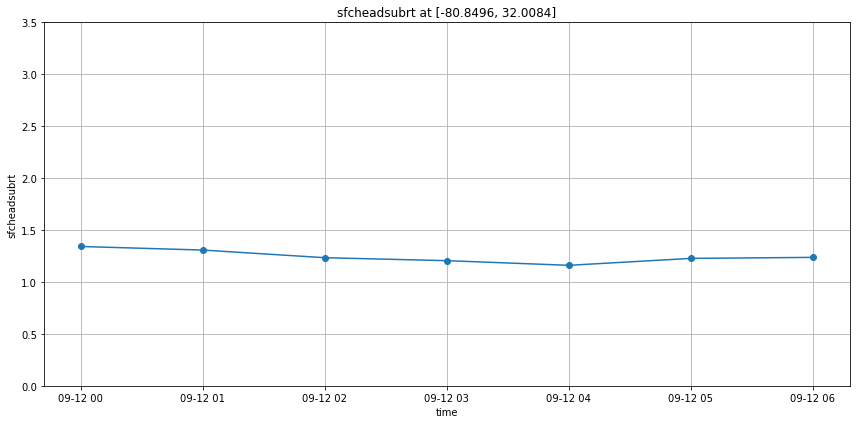

In [9]:
# 1D Plot Example
fig, axs = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (12, 6),
    facecolor = 'w',
)
axs.plot(
    df_plot.index,
    df_plot,
    marker = marker,
)

axs.set_title(title_1d)
axs.set_xlabel(x_label)
axs.set_ylabel(y_label)
axs.set_ylim(ylim)
axs.grid()

fig.tight_layout()
plt.savefig(savefig_1d)
plt.show()

# 2D Plot Example

In [10]:
# 2D Plot Example Input
plot_date = pd.Timestamp(ds_var['time'][0].values).to_pydatetime() # date/time to plot
ds_plot = ds_var[var].sel(time = plot_date)

title_2d = plot_date.strftime('%m/%d/%Y %H:%M')

basemap = cartopy.io.img_tiles.OSM() # basemap: OpenStreetMap
#basemap = cimgt.GoogleTiles(style = 'satellite') # basemap: Google Satelite Map
basemap_res = 15 # basemap resolution

extent = [-80.87, -80.83, 31.98, 32.04] # map extent: [lon_west, lon_east, lat_south, lat_north]
vmin, vmax = 0, 500
cmap = 'Blues'

ncolors = 256
carray = plt.get_cmap(cmap)(range(ncolors))
#carray[:,-1] = ncolors * [0.75] # NOTE: the alpha value is set to 0.75
carray[:,-1] = [0] + (ncolors - 1) * [0.75] # NOTE: the alpha value is set to 0 for cmin based on the colormap, otherwise 0.75
cmapobj = mpl.colors.ListedColormap(colors = carray)

savefig_2d = 'plot_2d.png'

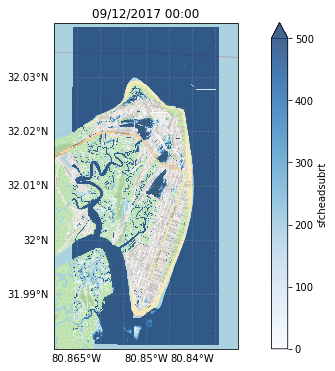

In [11]:
# 2D Plot Example
crs = cartopy.crs.LambertConformal(globe = cartopy.crs.Globe(ellipse = 'sphere', semimajor_axis = 6370000, semiminor_axis = 6370000), central_longitude = ds_plot['crs'].longitude_of_central_meridian, central_latitude = ds_plot['crs'].latitude_of_projection_origin, false_easting = ds_plot['crs'].false_easting, false_northing = ds_plot['crs'].false_northing, standard_parallels = ds_plot['crs'].standard_parallel)

fig, axs = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (12, 6),
    facecolor = 'w',
    subplot_kw = {'projection': basemap.crs},
)
axs.set_extent(extent)
axs.add_image(basemap, basemap_res)

fds = ds_plot.plot(
    ax = axs,
    transform = crs,
    vmin = vmin,
    vmax = vmax,
    cmap = cmapobj,
    antialiased = True,
)
gl = axs.gridlines(crs = cartopy.crs.PlateCarree(), linestyle = '--', alpha = 0.25, draw_labels = True)
gl.top_labels, gl.right_labels = False, False

axs.set_title(title_2d)
        
plt.savefig(savefig_2d)
plt.show()